<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/Week%203/Assignment/SVHN%20Dataset/SVHN_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import label_binarize

## Data Preparation

In [ ]:
# Load SVHN with supervised split
(ds_train, ds_test), ds_info = tfds.load('svhn_cropped',
                                         split=['train', 'test'],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

batch_size = 128

ds_train = ds_train.map(normalize_img).shuffle(10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).batch(batch_size).prefetch(tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.LL2MOU_3.1.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.LL2MOU_3.1.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.LL2MOU_3.1.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.1.0. Subsequent calls will reuse this data.


## CNN Model

In [ ]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_history = cnn_model.fit(ds_train, epochs=10, validation_data=ds_test)

Epoch 1/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.4655 - loss: 1.5785 - val_accuracy: 0.8176 - val_loss: 0.6622
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8400 - loss: 0.5762 - val_accuracy: 0.8455 - val_loss: 0.5668
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8675 - loss: 0.4784 - val_accuracy: 0.8667 - val_loss: 0.4896
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.8847 - loss: 0.4057 - val_accuracy: 0.8656 - val_loss: 0.4795
Epoch 5/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8958 - loss: 0.3636 - val_accuracy: 0.8766 - val_loss: 0.4462
Epoch 6/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9053 - loss: 0.3248 - val_accuracy: 0.8861 - val_loss: 0.4114
Epoch 7/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9168 - loss: 0.2868 - val_accuracy: 0.8853 - val_loss: 0.4135
Epoch 8/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9270 - loss: 0.2546 - 

### Evaluate CNN Model

In [ ]:
# Predict
y_true = []
y_pred = []

for images, labels in ds_test:
    preds = cnn_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print("CNN Test Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━

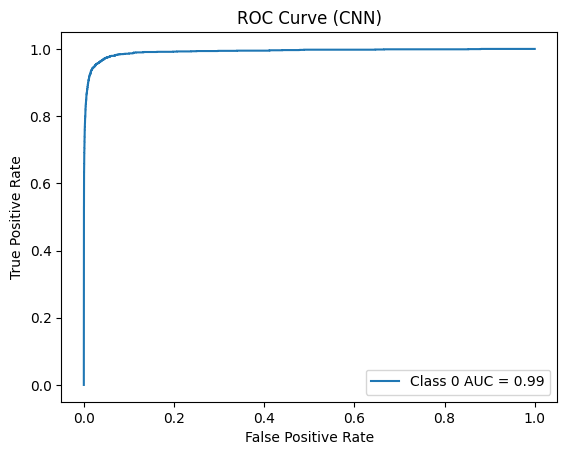

In [ ]:
y_true_bin = label_binarize(y_true, classes=range(10))

y_probs = []
for images, _ in ds_test:
    probs = cnn_model.predict(images)
    y_probs.extend(probs)
y_probs = np.array(y_probs)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_probs[:, i])

plt.plot(fpr[0], tpr[0], label=f'Class 0 AUC = {roc_auc[0]:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve (CNN)")
plt.show()

## MLP Model

In [ ]:
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

mlp_history = mlp_model.fit(ds_train, epochs=10, validation_data=ds_test)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


573/573 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.1888 - loss: 2.3181 - val_accuracy: 0.4440 - val_loss: 1.6477
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.5128 - loss: 1.4590 - val_accuracy: 0.5806 - val_loss: 1.3455
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6289 - loss: 1.1780 - val_accuracy: 0.6330 - val_loss: 1.1946
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.6677 - loss: 1.0668 - val_accuracy: 0.6575 - val_loss: 1.1258
Epoch 5/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.7009 - loss: 0.9729 - val_accuracy: 0.6724 - val_loss: 1.0888
Epoch 6/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.7158 - loss: 0.9283 - val_accuracy: 0.6982 - val_loss: 1.0096
Epoch 7/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7319 - loss: 0.8845 - val_accuracy: 0.7092 - val_loss: 0.9843
Epoch 8/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.7410 - loss: 0.8515 - val_accurac

### Evaluate MLP Model

In [ ]:
# Predict
y_true_mlp = []
y_pred_mlp = []

for images, labels in ds_test:
    preds = mlp_model.predict(images)
    y_true_mlp.extend(labels.numpy())
    y_pred_mlp.extend(np.argmax(preds, axis=1))

print("MLP Test Accuracy:", accuracy_score(y_true_mlp, y_pred_mlp))
print(classification_report(y_true_mlp, y_pred_mlp))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━

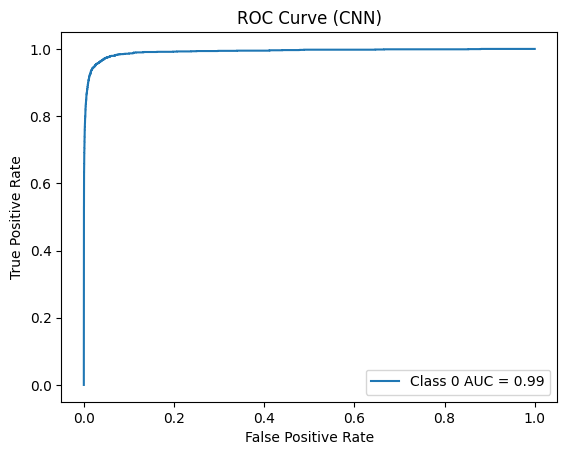

In [ ]:
y_true_bin = label_binarize(y_true, classes=range(10))

y_probs = []
for images, _ in ds_test:
    probs = cnn_model.predict(images)
    y_probs.extend(probs)
y_probs = np.array(y_probs)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_probs[:, i])

plt.plot(fpr[0], tpr[0], label=f'Class 0 AUC = {roc_auc[0]:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve (CNN)")
plt.show()

## Persamaan Matematis

Arsitektur :

1. Conv2D: Operasi konvolusi 2D

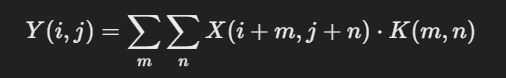

Diimplementasikan oleh:
**tf.keras.layers.Conv2D (TensorFlow)**

2. ReLU (Rectified Linear Unit)

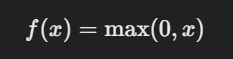

3. MaxPooling2D: Mengambil nilai maksimum dari window
Reduksi dimensi, meningkatkan translational invariance.

4. Flatten: Ubah matriks menjadi vektor 1D sebelum Fully Connected layer.

5. Dense / Linear:

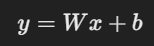

6. Softmax (output):

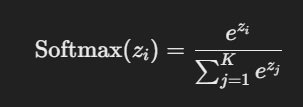

Akurasi:

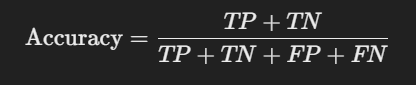

Presisi

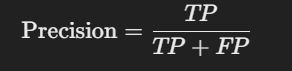

Recall, Kemampuan model dalam menemukan semua data positif:

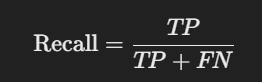

F1 Score
Harmonik rata-rata antara presisi dan recall:

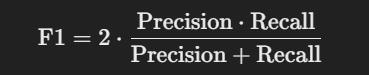

ROC Curve (Receiver Operating Characteristic)
Plot antara TPR (True Positive Rate) dan FPR (False Positive Rate):

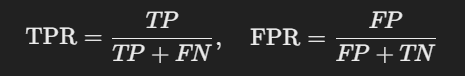